<a href="https://colab.research.google.com/github/CUM-BUTT/TryKeras/blob/main/3_%D0%BB%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D0%94%D0%B5%D0%B3%D1%82%D1%8F%D1%80%D1%91%D0%B2_%D0%98%D0%BB%D1%8C%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Дегтярёв Илья ПИН-41
#Нейронные сети
#лабораторная № 3

импорт необходимых библиотек

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

Формирование входных массивов (входной массив P) и (эталоны T)

In [ ]:
N = 1000
P = np.zeros((N, 21))
T = np.zeros((N, 3))
x = np.linspace(0.05, 1.0, num=21)
for i in range(0, N):
    C = 0.9 * np.random.rand() + 0.1
    A = 0.9 * np.random.rand() + 0.1
    S = 0.9 * np.random.rand() + 0.1
    T[i, 0] = C
    T[i, 1] = A
    T[i, 2] = S
    P[i, :] = C * np.exp(-((x - A) ** 2) / S)

    N_test = N - 20
x_train = P[:N_test, :]
y_train = T[:N_test, :]
x_test = P[N_test:, :]
y_test = T[N_test:, :]
print('x_train shape: ', x_train.shape, ', y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape, ', y_test shape: ', y_test.shape)

x_train shape:  (980, 21) , y_train shape:  (980, 3)
x_test shape:  (20, 21) , y_test shape:  (20, 3)


функция вывода графика потерь на тестовых и обучающих данных

In [ ]:
def PlotLoss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

создаие последовательной модели из трёх слоёв

на первом слое 21 нейрон и активация сигмоид

на втором слое 15 нейронов и активация сигмоид

на втором слое 3 нейронов и линейная активация

In [ ]:
model = tf.keras.Sequential()
model.add(layers.Dense(21, activation='sigmoid'))
model.add(layers.Dense(15, activation='sigmoid'))
model.add(layers.Dense(3, activation='linear'))
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=1)

# сохранение модели
model.save('lab3.model')
new_model = tf.keras.models.load_model('lab3.model')

# тест модели
val_loss, val_accuracy = new_model.evaluate(x_test, y_test)
print('val_loss: ', val_loss, ', val_accuracy: ', val_accuracy)

Epoch 1/50
980/980 [==============================] - 2s 1ms/step - loss: 0.0899 - accuracy: 0.4103 - val_loss: 0.0387 - val_accuracy: 0.7000
Epoch 2/50
980/980 [==============================] - 1s 1ms/step - loss: 0.0369 - accuracy: 0.6288 - val_loss: 0.0288 - val_accuracy: 0.8500
Epoch 3/50
980/980 [==============================] - 1s 1ms/step - loss: 0.0305 - accuracy: 0.6426 - val_loss: 0.0268 - val_accuracy: 0.8500
Epoch 4/50
980/980 [==============================] - 1s 1ms/step - loss: 0.0282 - accuracy: 0.6361 - val_loss: 0.0281 - val_accuracy: 0.8500
Epoch 5/50
980/980 [==============================] - 1s 1ms/step - loss: 0.0281 - accuracy: 0.6501 - val_loss: 0.0259 - val_accuracy: 0.8500
Epoch 6/50
980/980 [==============================] - 1s 1ms/step - loss: 0.0250 - accuracy: 0.6658 - val_loss: 0.0231 - val_accuracy: 0.9500
Epoch 7/50
980/980 [==============================] - 1s 1ms/step - loss: 0.0226 - accuracy: 0.6961 - val_loss: 0.0202 - val_accuracy: 0.9500
Epoch 

In [ ]:
c1 = 0.4
a1 = 0.6
s1 = 0.9
z = c1 * np.exp(-((x - a1) ** 2) / s1)
z = z.reshape(1, 21)
print(z)
print(z.shape)
prediction = new_model.predict([z])
print(prediction)

[[0.28581748 0.30214349 0.31780461 0.33260567 0.3463551  0.35886907
  0.36997549 0.37951801 0.38735959 0.39338585 0.3975078  0.39966403
  0.39982226 0.39798012 0.3941652  0.38843439 0.38087245 0.37158994
  0.36072051 0.3484177  0.33485137]]
(1, 21)
[[0.38298857 0.60412043 0.87413573]]


Функция добавляющая случайный шум

из диапазона от 0 до noise

In [ ]:
#0 – 0.01; 0 – 0.05; 0 – 0.1; 0 -0.2
def TestNoise(noise):
  plt.plot(x, z.reshape(21))
  prediction = new_model.predict([z + np.random.sample(z.shape)*noise])
  c, a, s = prediction[0]
  predicted_plot = c * np.exp(-((x-a)**2)/s)
  plt.plot(x, predicted_plot)
  plt.show()

на графике потерь на обучающей и тестовой выборке видно,

что на каждой эпохе обучения сети эти значения почти равны.

Это происходит из за того что и в тестовой и в обучающей выборке случайные значения в диапазоне (0, 1].

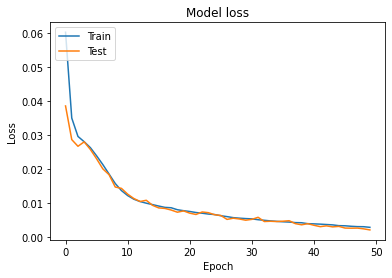

In [ ]:
PlotLoss(history=history)

рисуем график по предсказанным сетью величинам

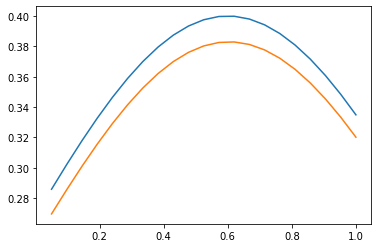

In [ ]:
TestNoise(0)

шум = 0,01

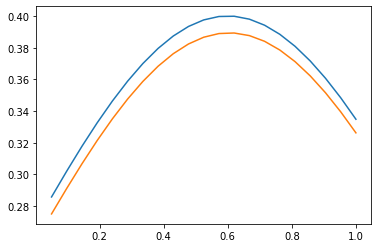

In [ ]:
TestNoise(0.01)

шум = 0,05

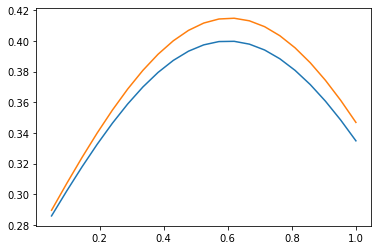

In [ ]:
TestNoise(0.05)

шум = 0,1

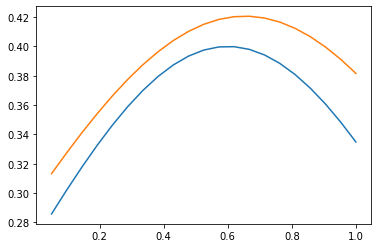

In [ ]:
TestNoise(0.1)

шум = 0,2

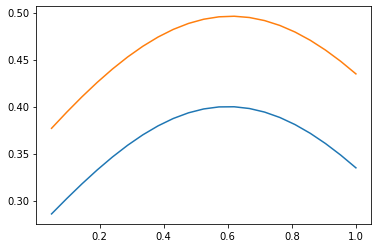

In [ ]:
TestNoise(0.2)